In [3]:
import pandas as pd
#from WindPy import w
import numpy as np
#w.start()





In [4]:
# 定义原始代码列表和需要移除的代码列表
original_codes = [
    "S.CBT"
    , "M.DCE", "Y.DCE", "P.DCE", "SB.NYB", "SR.CZC", "CT.NYB", "CF.CZC", "RM.CZC",
    "C.CBT", "C.DCE", "CS.DCE", "JD.DCE", "OI.CZC", "A.DCE", "LH.DCE", "PK.CZC", "RR.DCE",
    "BO.CBT", "SM.CBT", "W.CBT", "RR.CBT", "LC.CME", "LH.CME", "O.CBT", "YK.CBT", "YC.CBT",
    "YW.CBT", "FC.CME", "DA.CME", "OJ.NYB", "CC.NYB", "KC.NYB", "TT.NYM", "YO.NYM", "CJ.NYM",
    "KT.NYM", "BB.DCE", "FB.DCE", "RI.CZC", "LR.CZC", "JR.CZC", "PM.CZC", "WH.CZC", "RS.CZC",
    "B.DCE", "CJ.CZC", "CA.LME", "CU.SHF", "BC.INE", "HG.CMX", "ZS.LME", "ZN.SHF", "NI.LME",
    "NI.SHF", "RB.SHF", "AH.LME", "AL.SHF", "AO.SHF", "SN.LME", "SN.SHF", "PB.LME", "PB.SHF",
    "HC.SHF", "CO.LME", 
    "I.DCE"
    , "FEF.SG", "AA.LME", "LRAF.HK", "LRZF.HK", "LRSF.HK", "LRPF.HK",
    "LRNF.HK", "LRCF.HK", "SM.CZC", "SF.CZC", "SI.GFE", "WR.SHF", "SS.SHF", "SPTAUUSDOZ.IDC",
    "SPTAGUSDOZ.IDC", "GC.CMX", "SI.CMX", "AU.SHF", "AG.SHF", "AU(T+D).SGE", "AG(T+D).SGE",
    "AU9999.SGE", "SPTPTUSDOZ.IDC", "SPTPDUSDOZ.IDC", "PL.NYM", "PA.NYM", "MGC.CMX", "QO.CMX",
    "QI.CMX", "CL.NYM", "B.IPE", "T.IPE", "SC.INE", "LU.INE", "NG.NYM", "BU.SHF", "L.DCE", "PF.CZC",
    "TA.CZC", "PP.DCE", "EB.DCE", "RU.SHF", "NR.INE", "JM.DCE", "J.DCE", "ZC.CZC", "UR.CZC",
    "PG.DCE", "MA.CZC", "EG.DCE", "V.DCE", "FG.CZC", "SA.CZC", "SP.SHF", "RB.NYM", "HO.NYM",
    "QG.NYM", "QM.NYM", "N.IPE", "G.IPE", "BZ.NYM", "O.IPE", "ZE.CBT", "ATW.IPE", "AFR.IPE", "FU.SHF"
]





In [5]:
filtered_codes_by_oi_mean = []

# 存放OI均值大于100000的合约
filtered_codes_by_oi_mean = []

for code in original_codes:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    try:
        df = pd.read_csv(file_path)  # 尝试加载数据
        oi_mean = df['OI'].mean()  # 计算OI的均值
        if oi_mean > 100000:  # 判断OI均值是否大于100000
            filtered_codes_by_oi_mean.append(code)  # 如果是，则添加到筛选列表中
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到，跳过并继续。")  # 打印错误消息并继续


文件 SPTAUUSDOZ.IDC_weighted.csv 未找到，跳过并继续。


In [10]:
# 初始化一个空的DataFrame来存储所有统计值
all_describe = pd.DataFrame()

for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据
    stats = df.describe()  # 获取基本统计值
    
    # 调整stats DataFrame，使其包含合约代码作为一部分信息
    stats = stats.rename(columns=lambda x: f"{code}_{x}")
    
    # 将当前文件的统计值合并到总统计表中
    if all_describe.empty:
        all_describe = stats
    else:
        all_describe = pd.concat([all_describe, stats], axis=1)

# 打印合并后的统计表和加总的count值
print("合并后的统计表:")
print(all_describe)


合并后的统计表:
        S.CBT_OPEN   S.CBT_HIGH    S.CBT_LOW  S.CBT_CLOSE   S.CBT_VOLUME  \
count  1577.000000  1577.000000  1577.000000  1577.000000    1577.000000   
mean   1133.977612  1144.217322  1124.596238  1158.598403  206832.089410   
std     280.911254   284.680749   277.360904   238.633155   76566.749942   
min       0.000000     0.000000     0.000000   815.742051       0.000000   
25%     914.083212   919.781819   908.058605   918.456274  155564.000000   
50%    1094.193817  1133.929945  1091.499238  1157.173141  197250.000000   
75%    1362.078191  1373.784718  1345.294060  1366.009320  250082.000000   
max    1637.594930  1682.763724  1624.226996  1638.574742  737680.000000   

           S.CBT_OI   M.DCE_OPEN   M.DCE_HIGH    M.DCE_LOW  M.DCE_CLOSE  ...  \
count  1.577000e+03  1601.000000  1601.000000  1601.000000  1601.000000  ...   
mean   7.513130e+05  3250.870155  3277.744499  3223.816031  3251.645418  ...   
std    9.729950e+04   453.421118   461.578035   445.808282   454.6

In [13]:
# 初始化OI列的count加总值
total_oi_count = 0

# 通过列名筛选出所有的_OI列
oi_columns = [col for col in all_describe.columns if col.endswith('_OI')]

# 只从'all_describe'的'count'行中获取这些_OI列的值进行加总
total_oi_count = all_describe.loc['count', oi_columns].sum()

print(f"所有筛选后文件中OI列的count总和为: {total_oi_count}")


所有筛选后文件中OI列的count总和为: 101931.0


In [55]:
import pandas as pd
import numpy as np


for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据

    # 在替换之前计算NaN的数量
    initial_na_count = df.isna().sum().sum()

    # 将所有的0值替换为NaN
    df.replace(0, np.nan, inplace=True)

    # 替换之后计算NaN的数量
    post_replace_na_count = df.isna().sum().sum()

    # 计算替换操作增加的NaN数量
    replaced_na_count = post_replace_na_count - initial_na_count

    # 报告替换了多少个NaN
   # print(f"文件 {code} 替换了 {replaced_na_count} 个0值为NaN。")


In [31]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import talib

def create_labels(df, col_name, window_size=11):
    """
    Data is labeled as per the logic in research paper
    Label code: BUY => 1, SELL => 0, HOLD => 2
    params:
        df => Dataframe with data
        col_name => name of column which should be used to determine strategy
    returns: numpy array with integer codes for labels with
             size = total-(window_size)+1
    """
    print("Calculating labels")
    total_rows = len(df)
    labels = np.zeros(total_rows)
    labels[:] = np.nan
    pbar = tqdm(total=total_rows)
    row_counter = 0

    while row_counter < total_rows:
        if row_counter >= window_size - 1:
            window_begin = row_counter - (window_size - 1)
            window_end = row_counter
            window_middle = int((window_begin + window_end) / 2)

            min_ = np.inf
            min_index = -1
            max_ = -np.inf
            max_index = -1
            for i in range(window_begin, window_end + 1):
                price = df.iloc[i][col_name]
                if price < min_:
                    min_ = price
                    min_index = i
                if price > max_:
                    max_ = price
                    max_index = i

            if max_index == window_middle:
                labels[window_middle] = 0
            elif min_index == window_middle:
                labels[window_middle] = 1
            else:
                labels[window_middle] = 2

        row_counter += 1
        pbar.update(1)
    pbar.close()
    return labels

In [37]:
import pandas as pd
import talib

#for code in filtered_codes_by_oi_mean:
for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据

    # 将所有的0值替换为NaN
    df.replace(0, np.nan, inplace=True)
    
    df = df.sort_index(ascending=True)
    # 计算SMA 20日移动平均
    df['SMA_20'] = talib.SMA(df['CLOSE'], timeperiod=20)
    
    # 计算RSI 14日相对强弱指数
    df['RSI_14'] = talib.RSI(df['CLOSE'], timeperiod=14)
    
    # 计算布林带
    df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['CLOSE'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    
    # MACD
    df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['CLOSE'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    # On-Balance Volume
    df['obv'] = talib.OBV(df['CLOSE'], df['VOLUME'])
    
    # Average True Range
    df['atr'] = talib.ATR(df['HIGH'], df['LOW'], df['CLOSE'], timeperiod=14)
    
    df['label'] = create_labels(df, 'CLOSE', window_size=11)
    
    df_cleaned = df.dropna()
    
    df_cleaned.to_csv(f"{code}_technical.csv", index=False)





Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1471.89it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1696.75it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1652.69it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1680.78it/s]


Calculating labels


100%|██████████| 1575/1575 [00:00<00:00, 1664.41it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1627.51it/s]


Calculating labels


100%|██████████| 1575/1575 [00:00<00:00, 1585.24it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1609.93it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1685.37it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1602.37it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1418.32it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1560.50it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1525.11it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1500.74it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1558.77it/s]


Calculating labels


100%|██████████| 777/777 [00:00<00:00, 1597.66it/s]


Calculating labels


100%|██████████| 761/761 [00:00<00:00, 1539.54it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1586.03it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1587.76it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1577.91it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1643.79it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1528.73it/s]


Calculating labels


100%|██████████| 1575/1575 [00:00<00:00, 1681.78it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1648.98it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1630.97it/s]


Calculating labels


100%|██████████| 1578/1578 [00:00<00:00, 1625.11it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1656.04it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1646.58it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1589.81it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1556.12it/s]


Calculating labels


100%|██████████| 186/186 [00:00<00:00, 1495.77it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1596.61it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1547.18it/s]


Calculating labels


100%|██████████| 1592/1592 [00:00<00:00, 1699.06it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1645.40it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1650.16it/s]


Calculating labels


100%|██████████| 303/303 [00:00<00:00, 1466.55it/s]


Calculating labels


100%|██████████| 1089/1089 [00:00<00:00, 1686.50it/s]


Calculating labels


100%|██████████| 1580/1580 [00:00<00:00, 1651.58it/s]


Calculating labels


100%|██████████| 1579/1579 [00:00<00:00, 1651.40it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1621.06it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1658.68it/s]


Calculating labels


100%|██████████| 1580/1580 [00:00<00:00, 1687.98it/s]


Calculating labels


100%|██████████| 1594/1594 [00:01<00:00, 1480.49it/s]


Calculating labels


100%|██████████| 1594/1594 [00:00<00:00, 1639.50it/s]


Calculating labels


100%|██████████| 912/912 [00:00<00:00, 1618.88it/s]


Calculating labels


100%|██████████| 1580/1580 [00:00<00:00, 1643.09it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1575.86it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1568.44it/s]


Calculating labels


100%|██████████| 840/840 [00:00<00:00, 1719.36it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1479.51it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1637.61it/s]


Calculating labels


100%|██████████| 1088/1088 [00:00<00:00, 1646.60it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1643.66it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1625.63it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1658.44it/s]


Calculating labels


100%|██████████| 1258/1258 [00:00<00:00, 1560.74it/s]


Calculating labels


100%|██████████| 1121/1121 [00:00<00:00, 1687.57it/s]


Calculating labels


100%|██████████| 968/968 [00:00<00:00, 1623.63it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1540.49it/s]


Calculating labels


100%|██████████| 1283/1283 [00:00<00:00, 1631.01it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1477.07it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1630.26it/s]


Calculating labels


100%|██████████| 1042/1042 [00:00<00:00, 1672.68it/s]


Calculating labels


100%|██████████| 1292/1292 [00:00<00:00, 1601.53it/s]


Calculating labels


100%|██████████| 1580/1580 [00:01<00:00, 1413.28it/s]


Calculating labels


100%|██████████| 1580/1580 [00:00<00:00, 1679.94it/s]


Calculating labels


100%|██████████| 1594/1594 [00:00<00:00, 1711.94it/s]


Calculating labels


100%|██████████| 1579/1579 [00:00<00:00, 1680.65it/s]


Calculating labels


100%|██████████| 1404/1404 [00:00<00:00, 1641.70it/s]


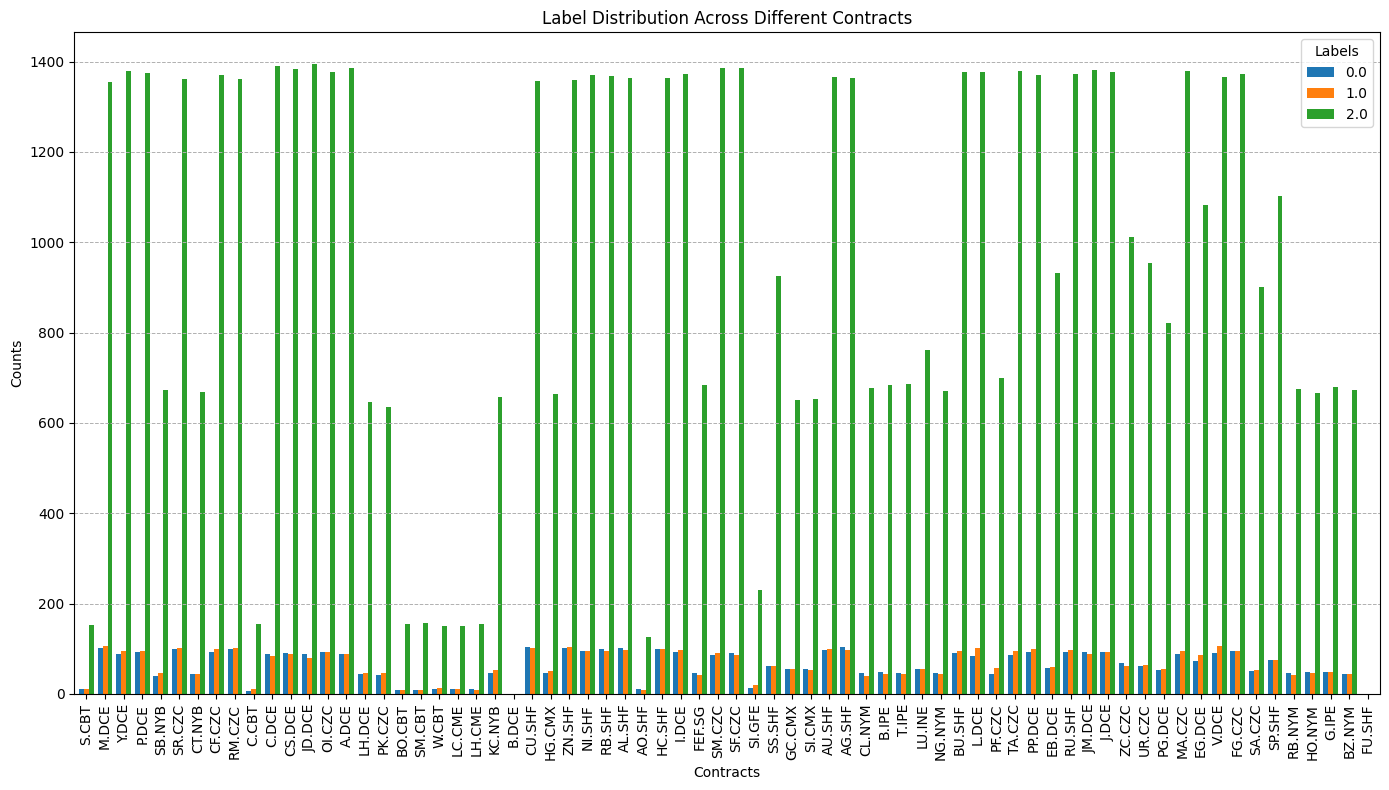

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 初始化一个空字典来存储每个合约的标签分布
label_distributions = {}

# 遍历每个合约代码，加载数据，计算标签分布
for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_technical.csv"  # 假设标签数据保存在这些文件中
    data = pd.read_csv(file_path)
    label_distribution = data['label'].value_counts()  # 计算标签的绝对数
    label_distributions[code] = label_distribution

# 创建一个新的DataFrame来存储所有合约的标签分布数据
df_distributions = pd.DataFrame(label_distributions).T.fillna(0)

# 绘制条形图
df_distributions.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Label Distribution Across Different Contracts')
plt.ylabel('Counts')
plt.xlabel('Contracts')
plt.legend(title='Labels')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 初始化存储容器
scalers = {}  # 用于存储每个品种的scaler
all_X_train = []
all_X_test = []
all_y_train = []
all_y_test = []
all_dates = []  # 保存每个样本的日期范围
all_varieties = []  # 保存每个样本的品种信息

for code in  filtered_codes_by_oi_mean:
    file_path = f"{code}_technical.csv"
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到，跳过此文件。")
        continue

    # 转换第一列为日期格式并按日期排序
    data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])
    data = data.sort_values(data.columns[0])

    if len(data) < lookback_days:  # 如果数据量小于回溯天数
        print(f"数据集 {code} 太小，无法创建有效的训练集。跳过此数据集。")
        continue
        
    # 添加品种代码作为特征
    data['Variety'] = code

    lookback_days = 50
    features = []
    labels = []
    
    # 选择除了标签、变化百分比和日期之外的所有列作为特征
    feature_columns = data.columns[1:-2]

    # 创建输入-输出对
    for i in range(lookback_days, len(data)):
        window = data.iloc[i - lookback_days:i][feature_columns].values
        label = data.iloc[i, -2]
        features.append(window)
        labels.append(label)
        start_date = data.iloc[i - lookback_days, 0]  # 起始日期
        all_dates.append(start_date.strftime('%Y-%m-%d'))  # 转换为字符串格式
        all_varieties.append(code)  # 保存品种
        
    X = np.array(features)
    y = np.array(labels)

    # 分割数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

    # 初始化StandardScaler
    scaler =MinMaxScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)
    
     # 添加一个额外的维度以表示单通道
    X_train_scaled = X_train_scaled.reshape((*X_train_scaled.shape, 1))
    X_test_scaled = X_test_scaled.reshape((*X_test_scaled.shape, 1))
    
    # 保存scaler
    scalers[code] = scaler
    
    # 将处理后的数据添加到列表中
    all_X_train.append(X_train_scaled)
    all_X_test.append(X_test_scaled)
    all_y_train.append(y_train)
    all_y_test.append(y_test)

# 使用np.concatenate来合并数据
X_train_combined = np.concatenate(all_X_train, axis=0)
X_test_combined = np.concatenate(all_X_test, axis=0)
y_train_combined = np.concatenate(all_y_train, axis=0)
y_test_combined = np.concatenate(all_y_test, axis=0)

数据集 B.DCE 太小，无法创建有效的训练集。跳过此数据集。
数据集 FU.SHF 太小，无法创建有效的训练集。跳过此数据集。


In [59]:
# Check the shapes of the resulting arrays
X_train_combined.shape, X_test_combined.shape, y_train_combined.shape, y_test_combined.shape

((50095, 50, 16, 1), (21498, 50, 16, 1), (50095,), (21498,))

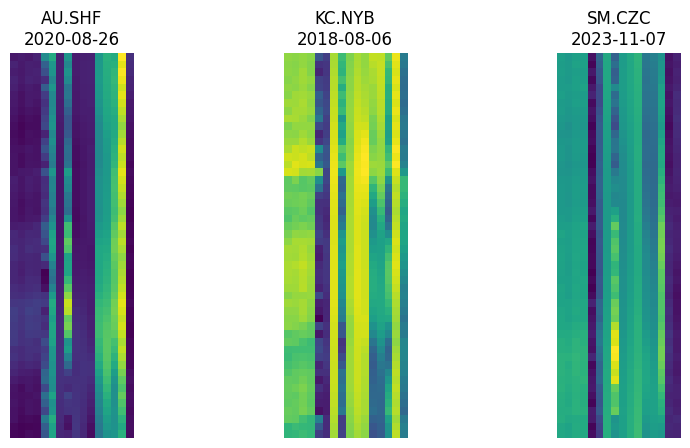

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# 随机选择三个样本的索引
indices = np.random.choice(X_train_combined.shape[0], 3, replace=False)

# 创建一个图和三个子图 (axs) 的网格
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# 遍历所选的每个索引和对应的子图
for i, ax in zip(indices, axs.flatten()):
    # 从训练集中获取对应的样本
    # 注意: 我们需要使用squeeze()方法去掉大小为1的维度，使得imshow能够正常工作
    image = X_train_combined[i].squeeze()
    
    # 使用灰度色彩映射显示图像
    ax.imshow(image, cmap='viridis')
    
    title = f'{all_varieties[i]}\n{all_dates[i]}'
    # 设置图像的标题为样本的索引
    ax.set_title(title)
    
    # 关闭坐标轴显示
    ax.axis('off')

# 显示图像
plt.show()
